In [55]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Advertisements v Sales

In [69]:
# We will use and advertising dataset to train our regression models
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)


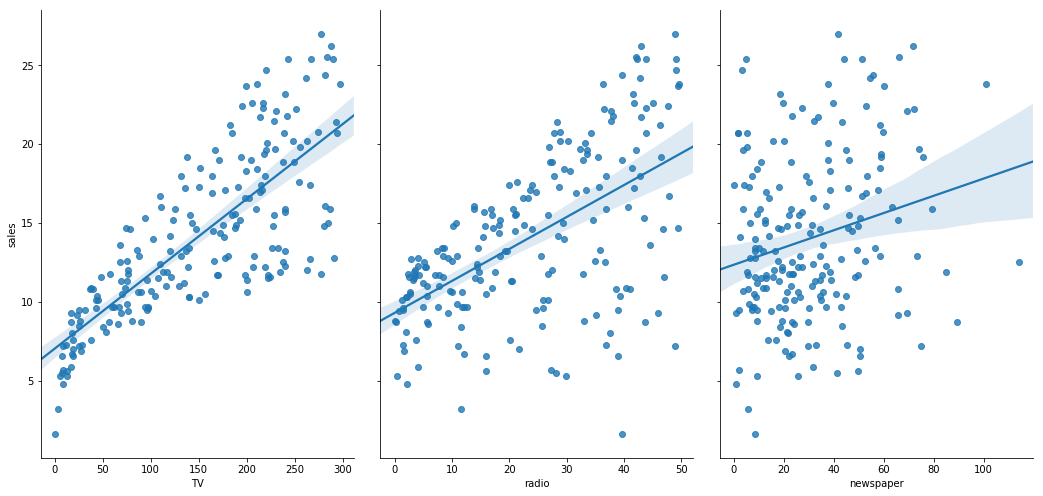

In [22]:
# Visualize the relationship between features and response
%matplotlib inline

sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg')


### Preparing X and y using Pandas

In [33]:
# features matrix X
feature_cols = ['TV','radio','newspaper']
X = data[feature_cols]

# response vector y
y = data['sales']

# split X and y into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Linear regression with scikit-learn

In [72]:
linreg = LinearRegression()

# fit the model to the training data (learn coefficients)
linreg.fit(X_train, y_train)

# pair the features with the coefficients
zipped = list(zip(feature_cols, linreg.coef_))

# make predictions on the test set
y_pred = linreg.predict(X_test)

### Model Evaluation

In [42]:
# example true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [75]:
## Mean Absolute Error: the mean of the absolute value of errors

# MAE by hand
print((10 + 0 + 20 + 10)/4)

# MAE using sk-learn
print(metrics.mean_absolute_error(true, pred))

# Computing MAE for our Sales predictions
print(metrics.mean_absolute_error(y_test, y_pred))

10.0
10.0
1.0668917082595206


In [77]:
## Mean Squared Error: the mean of the squared errors

# MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4)

# MSE using sk-learn
print(metrics.mean_squared_error(true, pred))

# Computing MSE for our Sales predictions
print(metrics.mean_squared_error(y_test, y_pred))

150.0
150.0
1.9730456202283368


In [52]:
## Root Mean Squared Error: the sqr. root of mean of the squared errors

# RMSE by hand
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4))

# RMSE using sk-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


* MAE: easiest to understand, it's the average error
* MSE: more popular than MAE because it "punishes" larger errors
* RMSE: even more popular than MSE because it's in "y" units

In [53]:
# Computing RMSE for our Sales predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895


## Cross-validation example: feature selection
#### Goal: Select whether Newspaper feature should be included

In [62]:
# 10-fold CV with all three features
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=10, scoring='neg_mean_squared_error')

mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)

# calculate the average RMSE
print(rmse_scores.mean())


1.6913531708051797


In [64]:
# 10-fold CV with two features (no newspaper ads)
feature_cols = ['TV', 'radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lr, X, y, cv=10, scoring='neg_mean_squared_error')).mean())


1.6796748419090768
